In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import time
import datetime
%matplotlib inline
import mplfinance as mpf

In [2]:
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}

In [3]:
ticker_symbols = ['ASIANPAINT.NS', 'SBIN.NS','TSLA', 'GOOGL', 'AAPL', 'NFLX', 'META','MSFT','HPE', 'MDB']
today = datetime.datetime.now().replace(hour=11, minute=0, second=0, microsecond=0)
one_year = today  - datetime.timedelta(days=365)
period1 = int(time.mktime(one_year.timetuple()))
period2 = int(time.mktime(today.timetuple()))

xlwriter = pd.ExcelWriter('historical_prices.xlsx', engine='xlsxwriter')

In [4]:
for symbol in ticker_symbols:
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true'
    response = requests.get(url, headers=headers)
    print(response)
    soup = BeautifulSoup(response.text, 'html.parser' )

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [5]:
for symbol in ticker_symbols:
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true'
    df = pd.read_csv(url)
    df.to_excel(xlwriter, sheet_name=symbol, index=False)

xlwriter.save()



In [6]:
xlsx = pd.read_excel('historical_prices.xlsx', sheet_name=None)

for sheet_name, df in xlsx.items():
    csv_filename = f'{sheet_name}_historical_prices.csv'
    df.to_csv(csv_filename, index=False)

In [7]:
xlsx = pd.read_excel('historical_prices.xlsx', sheet_name=None)

for sheet_name, df in xlsx.items():
    print(f"Stock: {sheet_name}")
    print(df)

Stock: ASIANPAINT.NS
           Date         Open         High          Low        Close  \
0    2022-06-06  2871.100098  2872.000000  2807.699951  2817.449951   
1    2022-06-07  2800.000000  2804.000000  2731.000000  2744.699951   
2    2022-06-08  2771.899902  2775.000000  2700.000000  2705.199951   
3    2022-06-09  2680.000000  2697.600098  2633.750000  2686.800049   
4    2022-06-10  2665.000000  2736.000000  2652.000000  2708.750000   
..          ...          ...          ...          ...          ...   
244  2023-05-31  3151.949951  3219.350098  3136.449951  3192.949951   
245  2023-06-01  3235.350098  3249.899902  3207.000000  3240.699951   
246  2023-06-02  3239.399902  3249.949951  3219.000000  3237.250000   
247  2023-06-05  3239.949951  3239.949951  3195.000000  3199.750000   
248  2023-06-06  3207.750000  3238.899902  3195.000000  3212.750000   

       Adj Close   Volume  
0    2797.270020  1193698  
1    2725.041016  1403598  
2    2685.823975  1743575  
3    2682.9284

In [8]:
for symbol in ticker_symbols:
    dataframe = f'{symbol}_historical_prices.csv'
    data = pd.read_csv(dataframe)
    data.Date = pd.to_datetime(data.Date)
    data = data.set_index('Date')
    print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-06-06  2871.100098  2872.000000  2807.699951  2817.449951  2797.270020   
2022-06-07  2800.000000  2804.000000  2731.000000  2744.699951  2725.041016   
2022-06-08  2771.899902  2775.000000  2700.000000  2705.199951  2685.823975   
2022-06-09  2680.000000  2697.600098  2633.750000  2686.800049  2682.928467   
2022-06-10  2665.000000  2736.000000  2652.000000  2708.750000  2704.846680   
...                 ...          ...          ...          ...          ...   
2023-05-31  3151.949951  3219.350098  3136.449951  3192.949951  3192.949951   
2023-06-01  3235.350098  3249.899902  3207.000000  3240.699951  3240.699951   
2023-06-02  3239.399902  3249.949951  3219.000000  3237.250000  3237.250000   
2023-06-05  3239.949951  3239.949951  3195.000000  3199.750000  3199.750000   
2023-06-06  3207.750000  3238.899902  3195.000000  3

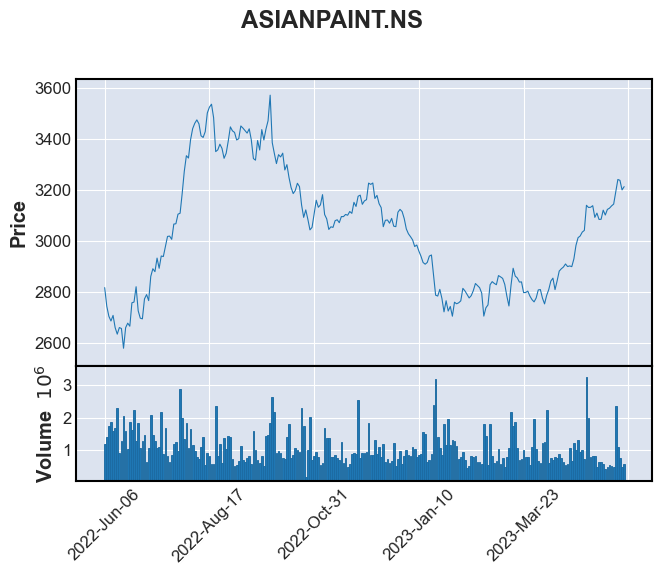

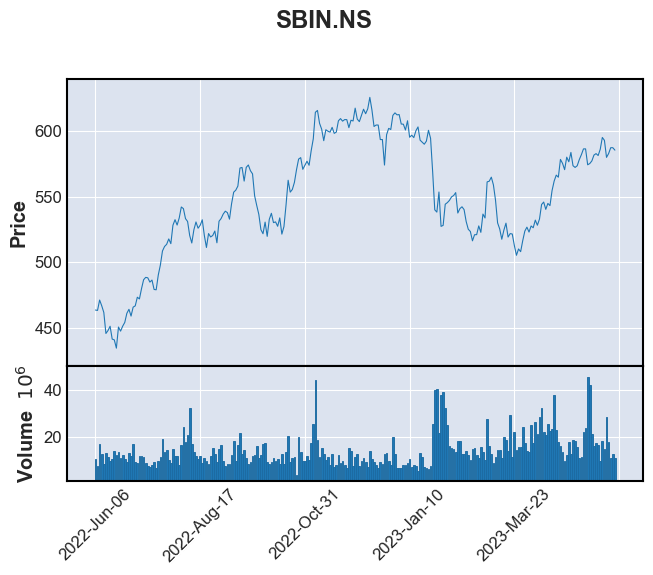

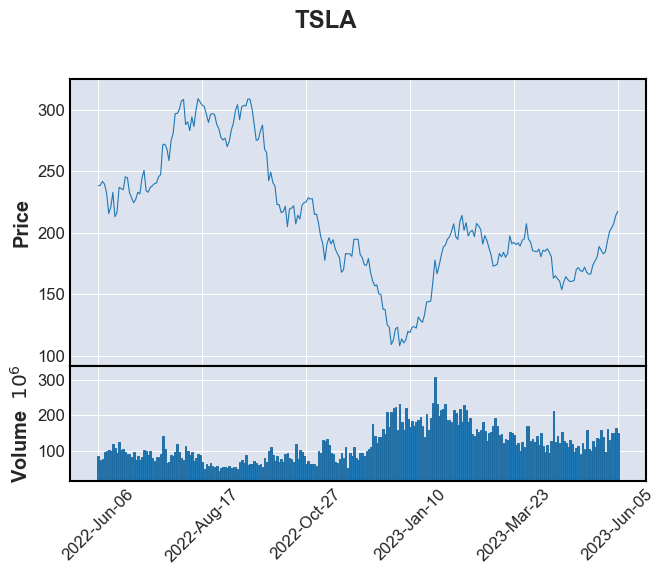

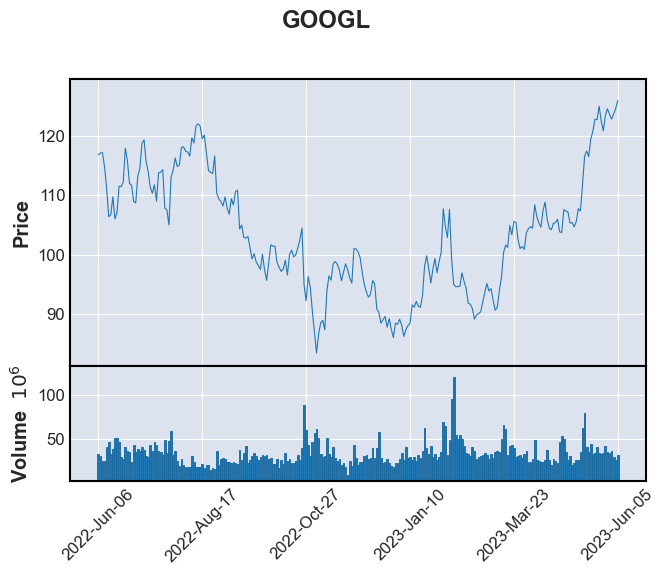

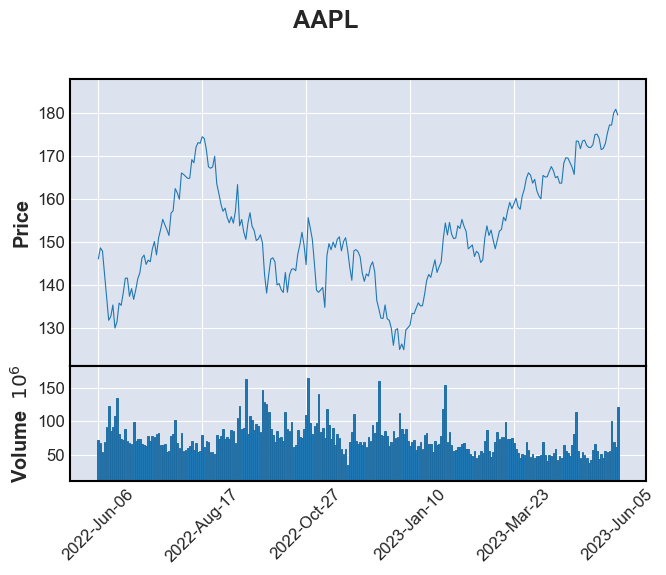

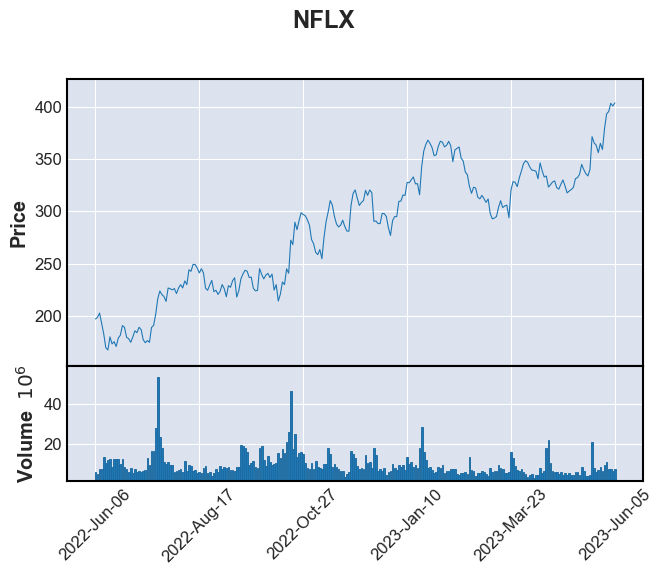

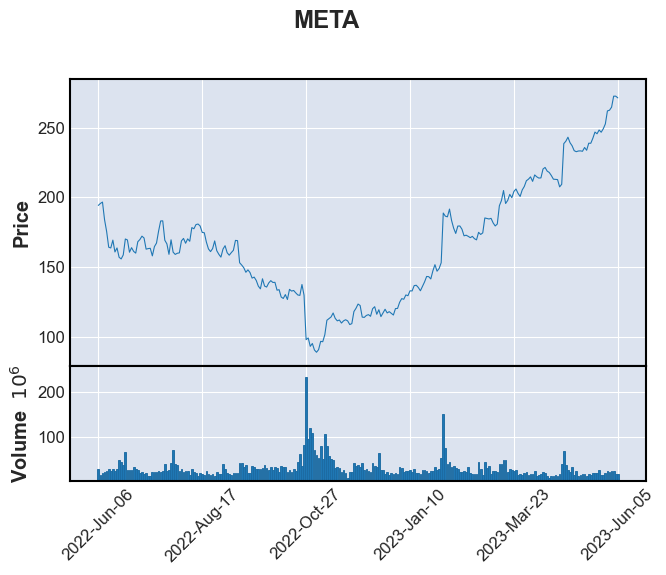

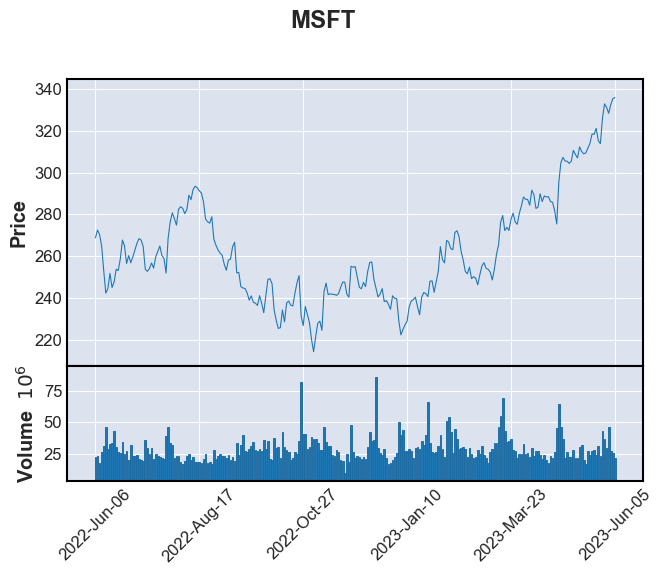

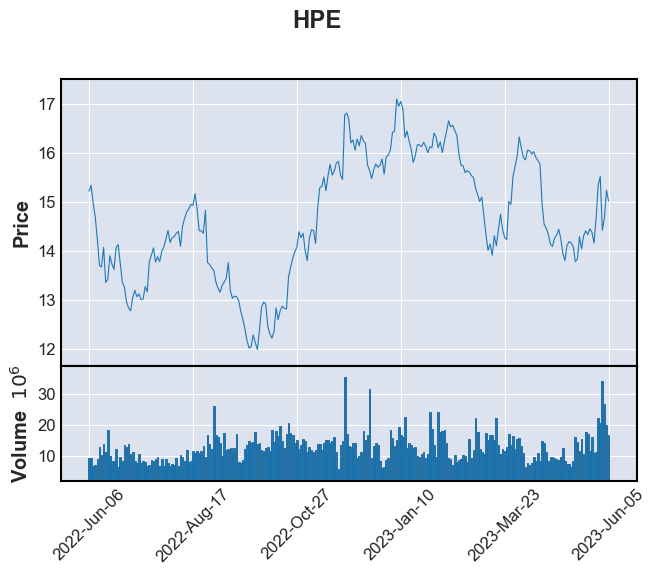

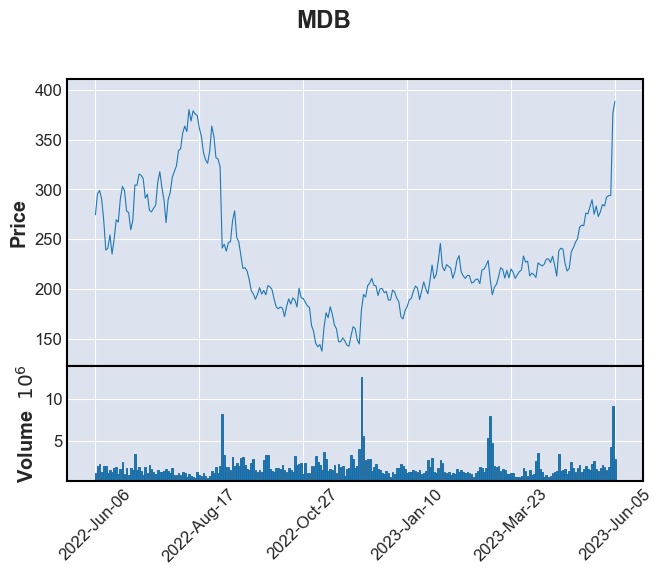

In [9]:
for symbol in ticker_symbols:
    dataframe = f'{symbol}_historical_prices.csv'
    data = pd.read_csv(dataframe)
    data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)
    data = data.set_index('Date')
    mpf.plot(data, type="line",title = symbol, volume = True)

{'ASIANPAINT.NS'}


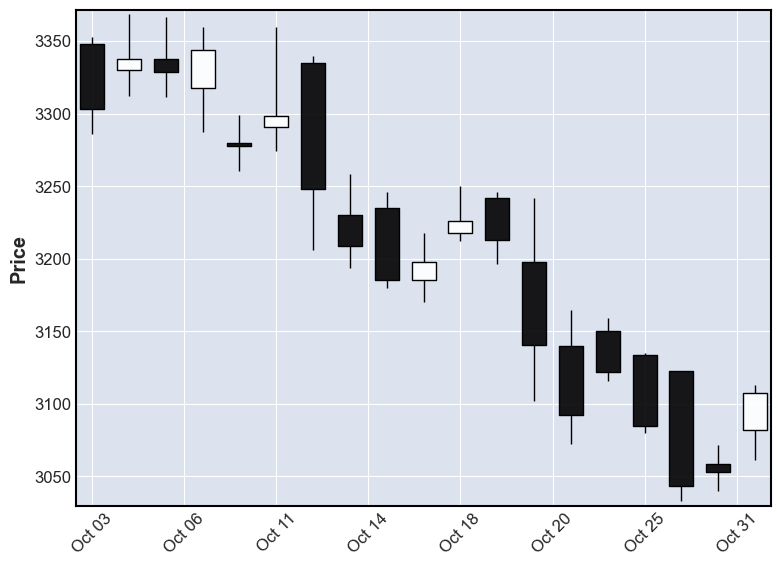

{'SBIN.NS'}


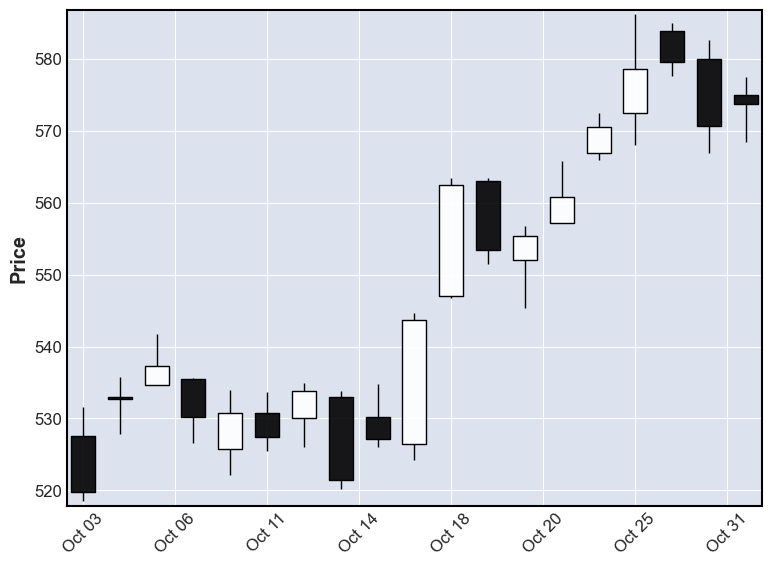

{'TSLA'}


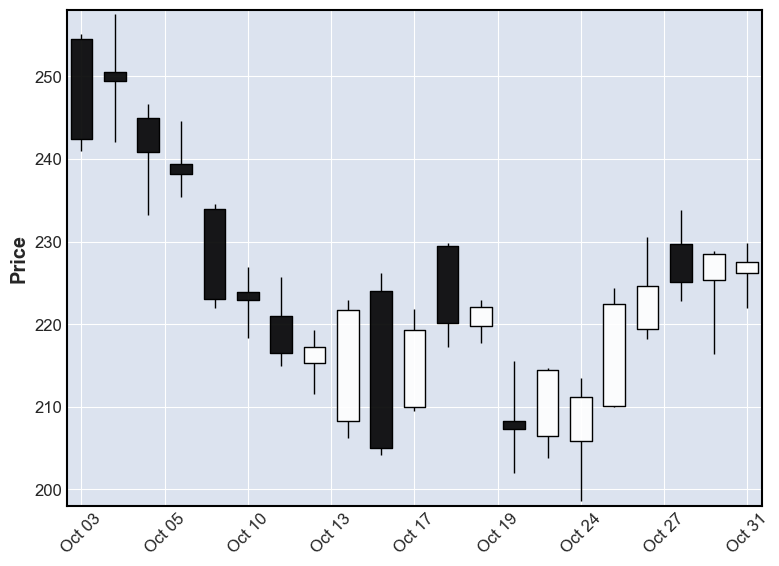

{'GOOGL'}


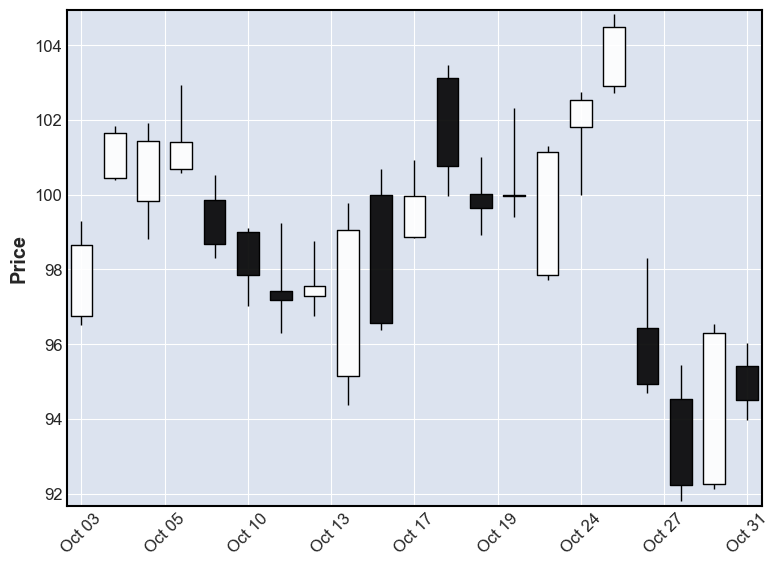

{'AAPL'}


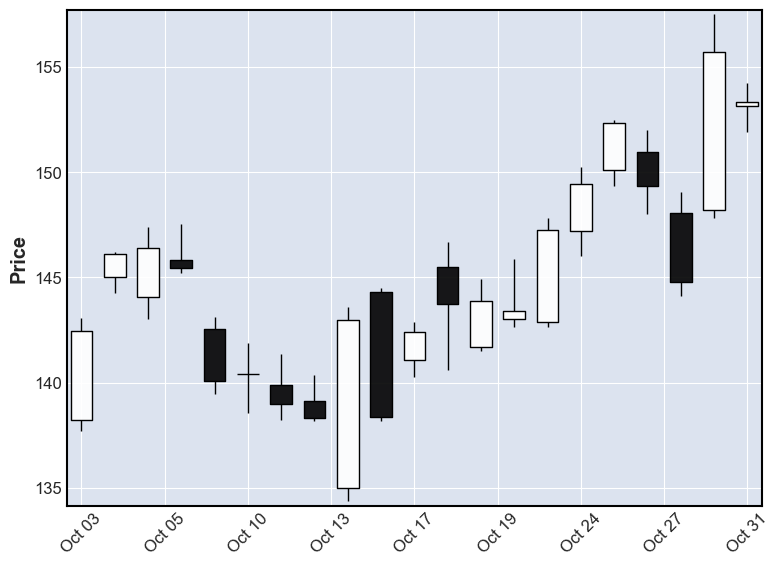

{'NFLX'}


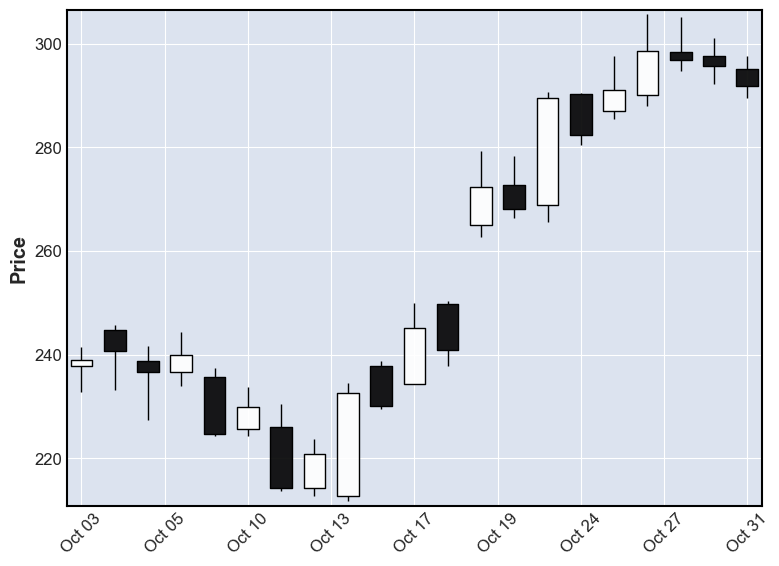

{'META'}


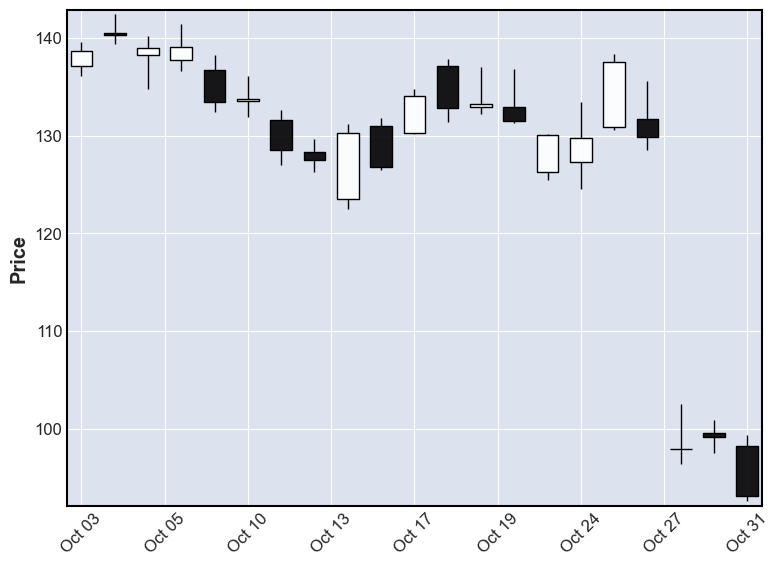

{'MSFT'}


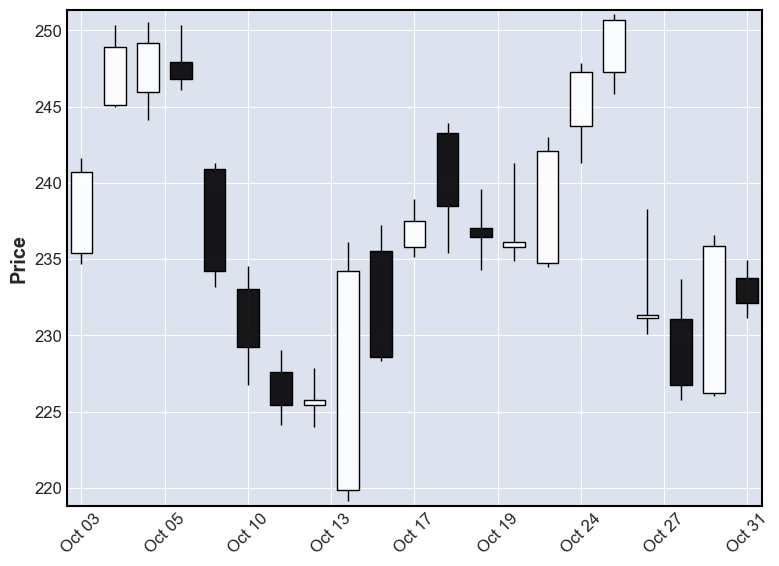

{'HPE'}


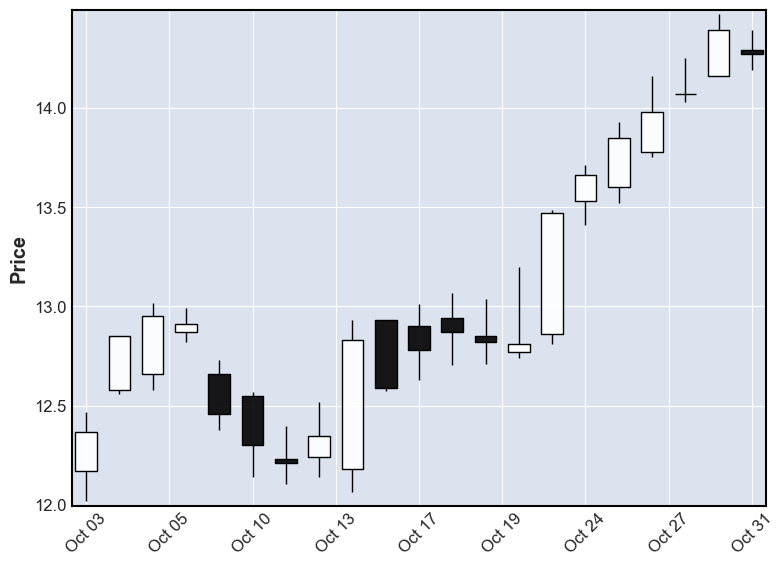

{'MDB'}


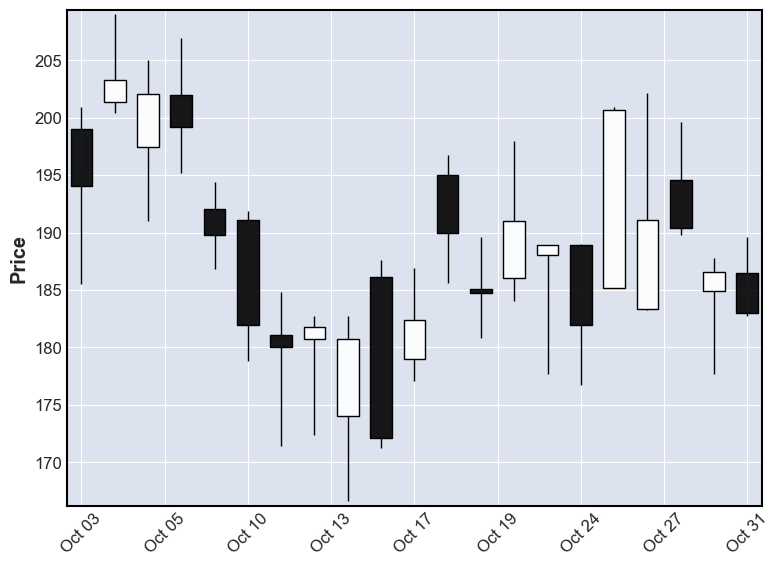

In [10]:
#candlestick
for symbol in ticker_symbols:
    dataframe = f'{symbol}_historical_prices.csv'
    data = pd.read_csv(dataframe)
    data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)
    data = data.set_index('Date')
    print({symbol})
    mpf.plot(data.loc['2022-10'], type='candle', tight_layout=True)

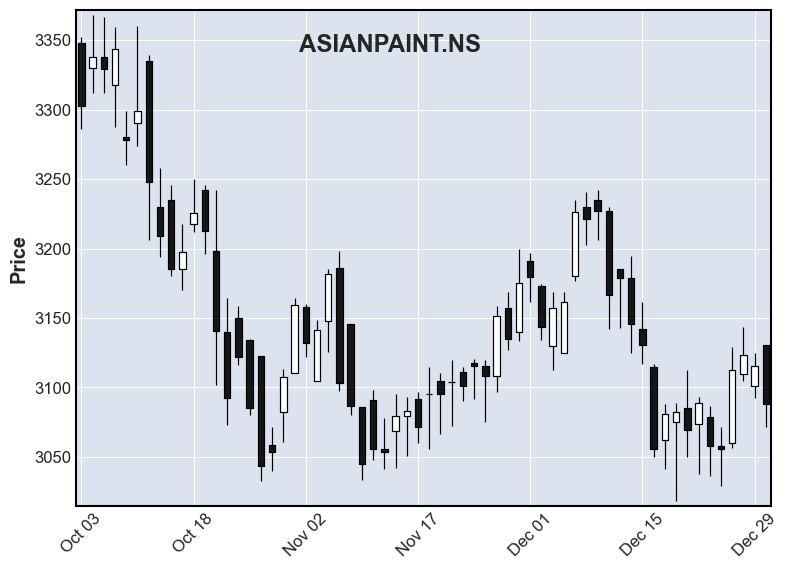

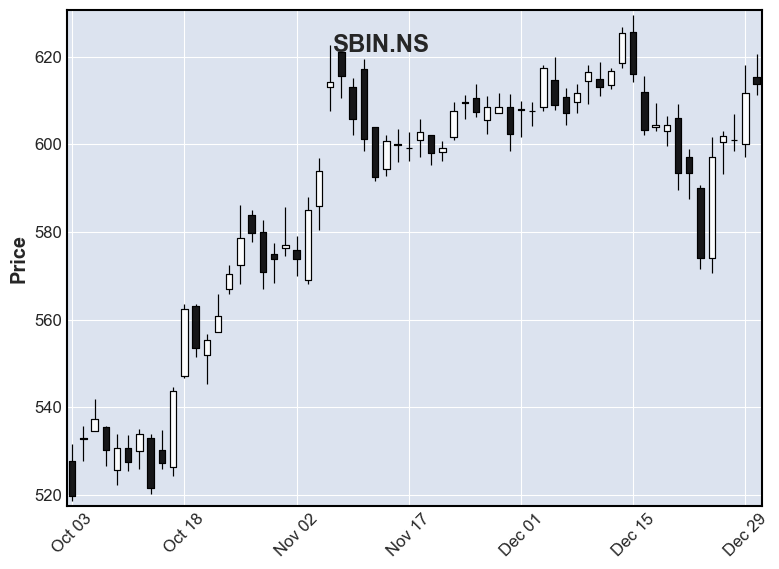

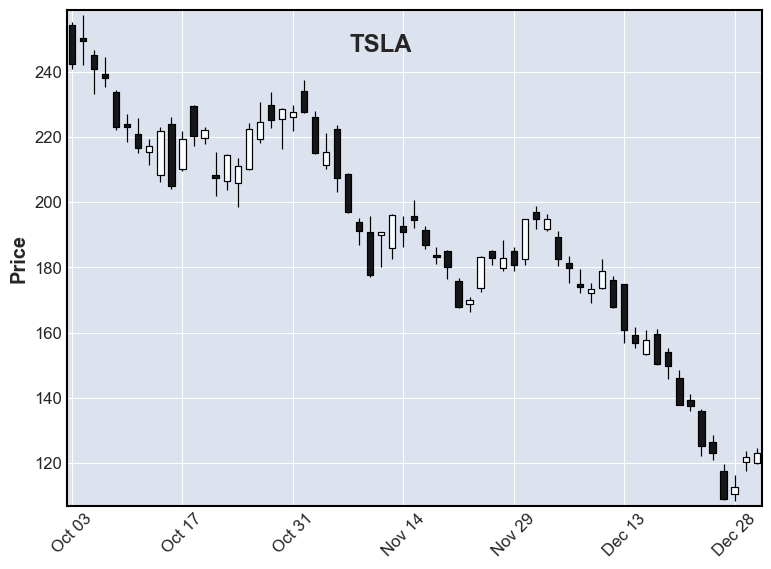

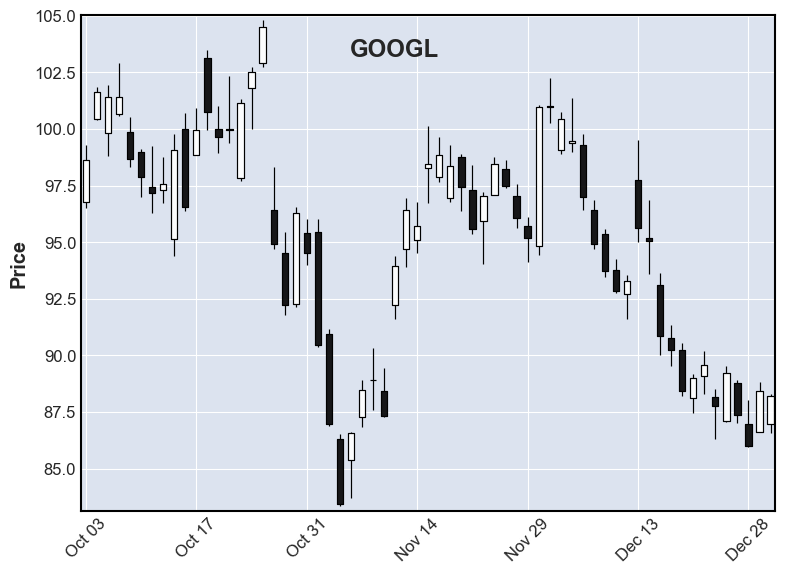

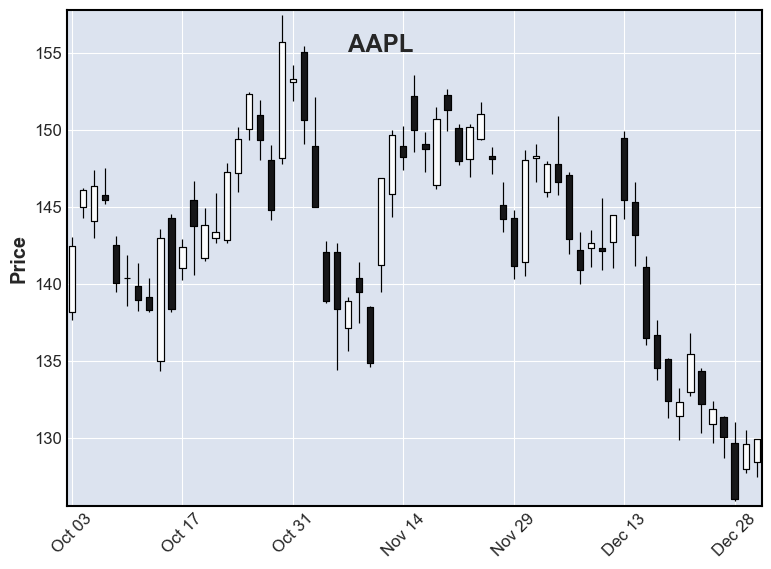

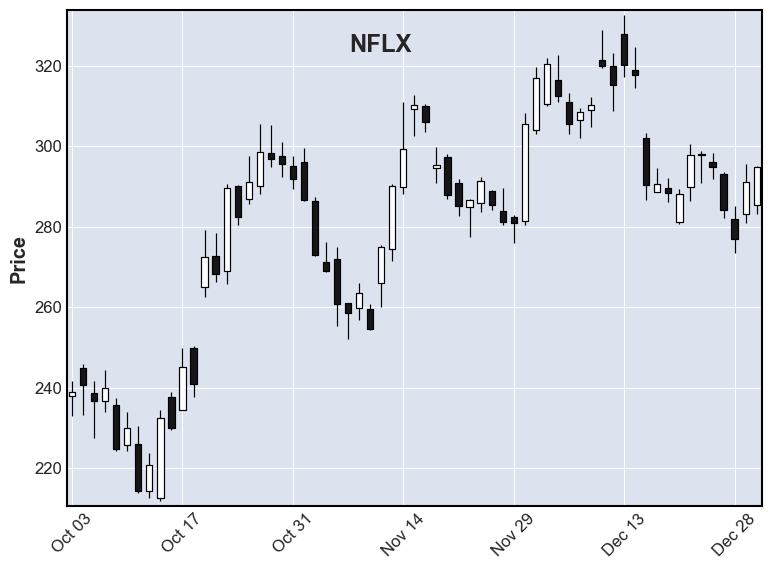

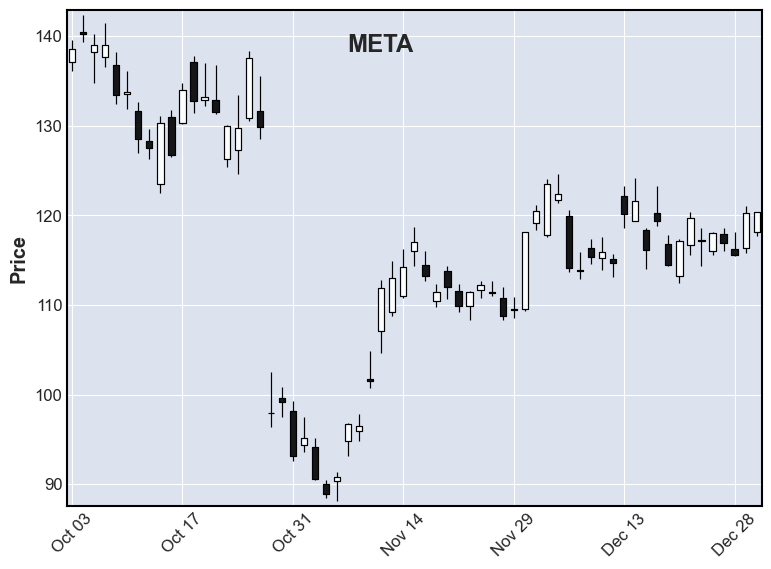

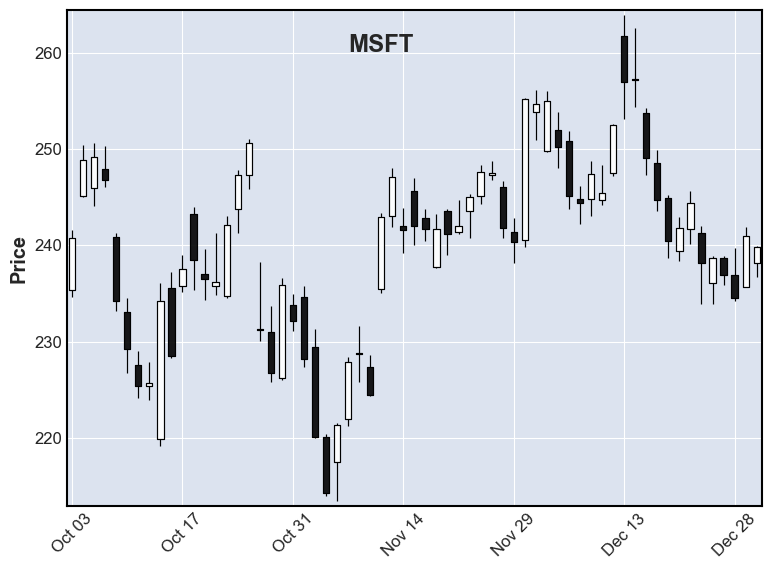

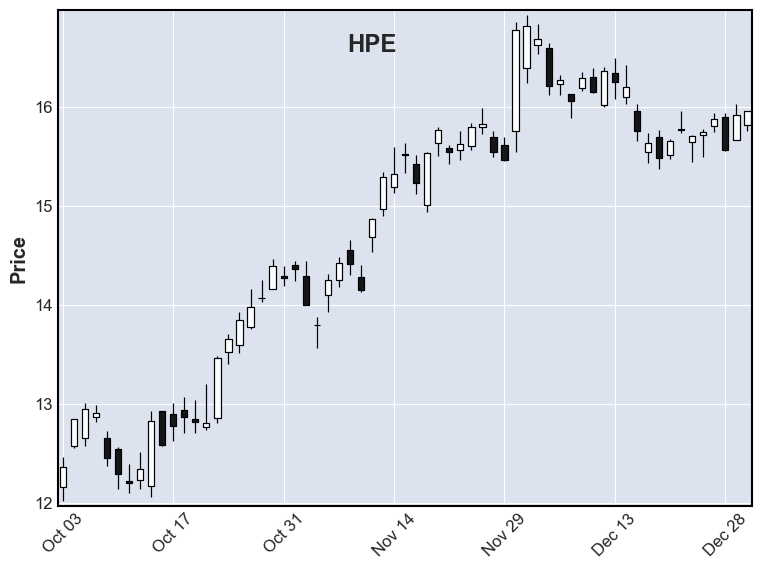

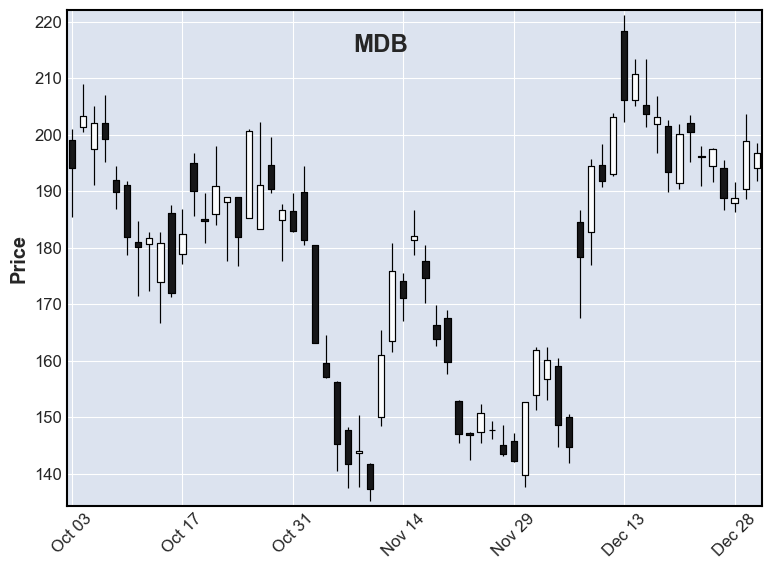

In [11]:
#candlestick
for symbol in ticker_symbols:
    dataframe = f'{symbol}_historical_prices.csv'
    data = pd.read_csv(dataframe)
    data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)
    data = data.set_index('Date')
    mpf.plot(data['2022-10':'2022-12'], title = symbol, type="candle", tight_layout=True)

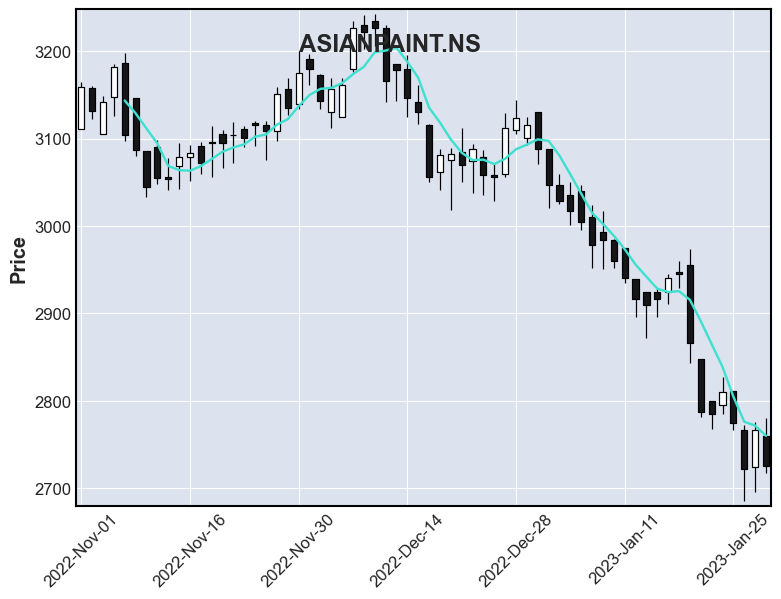

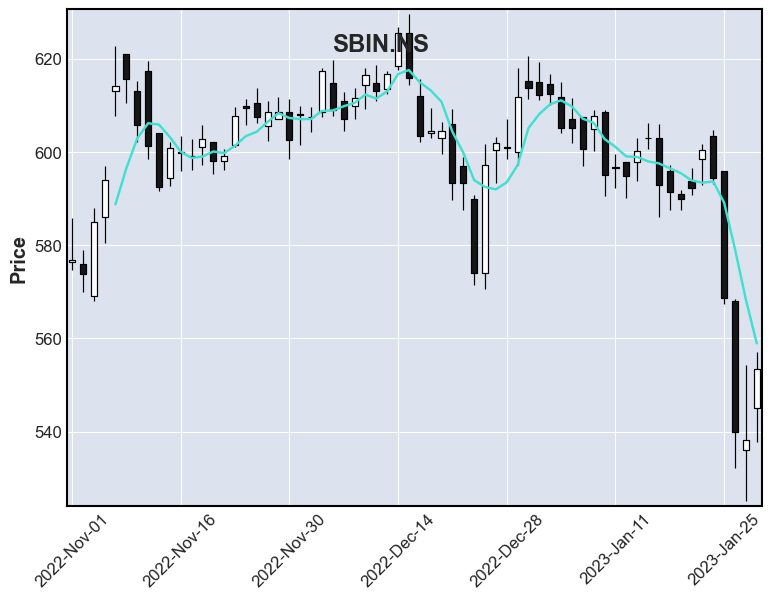

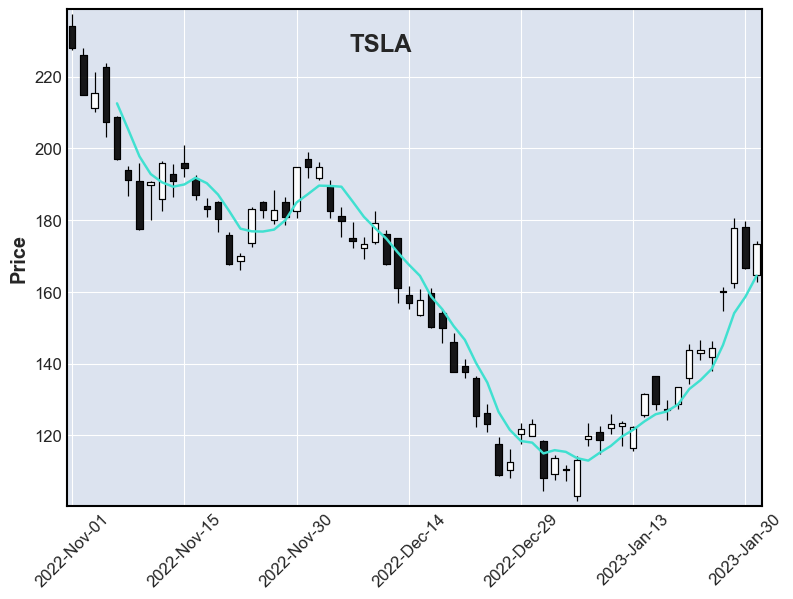

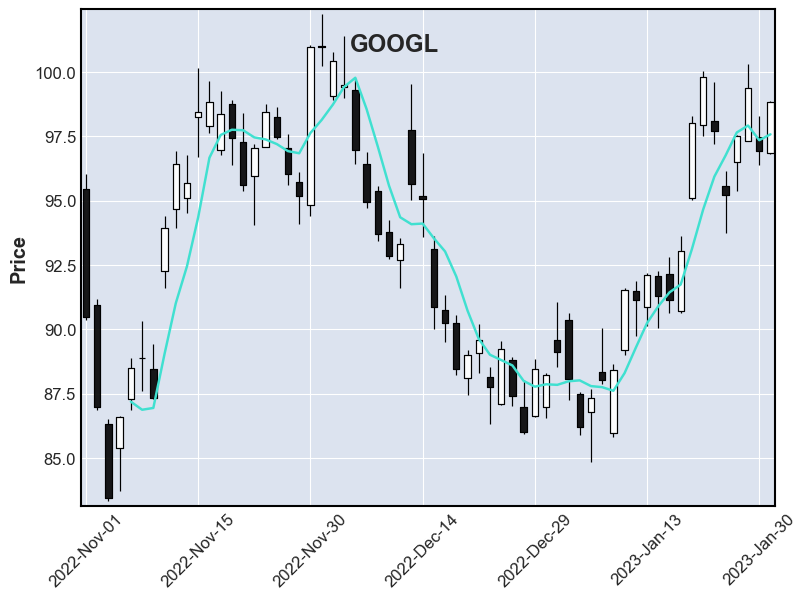

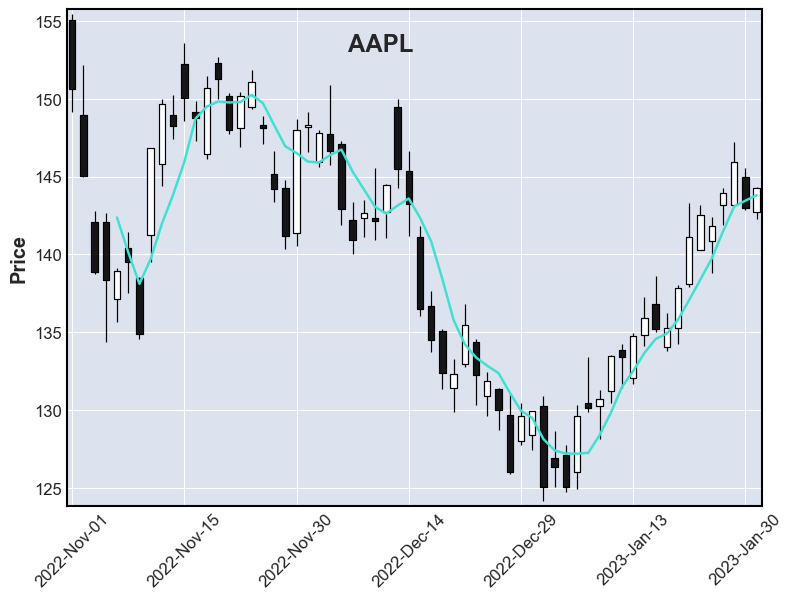

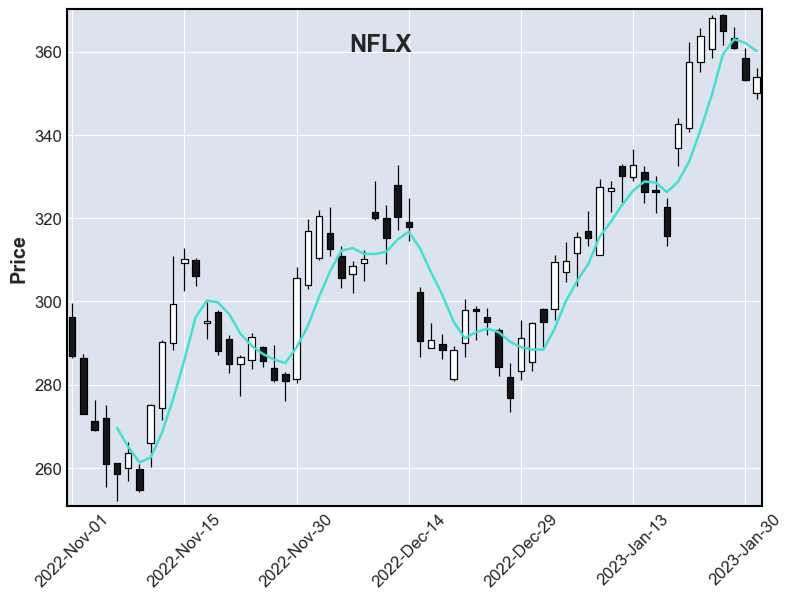

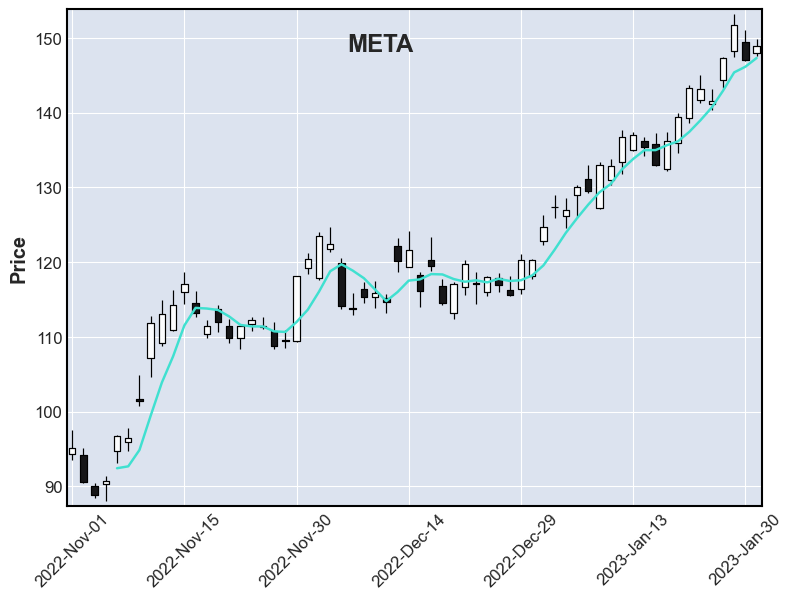

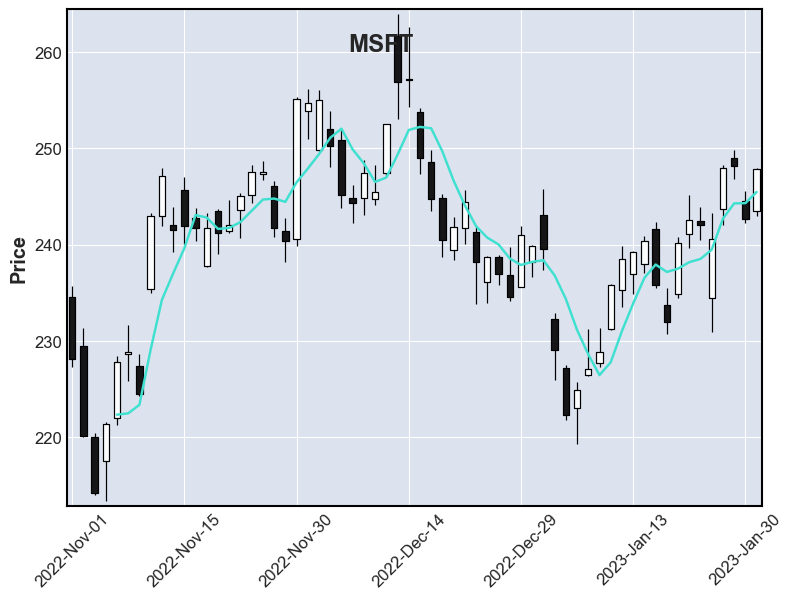

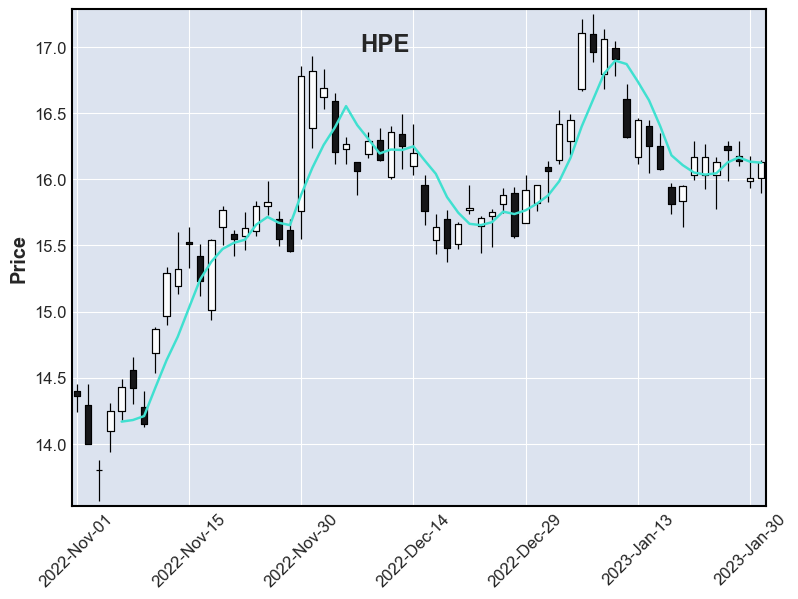

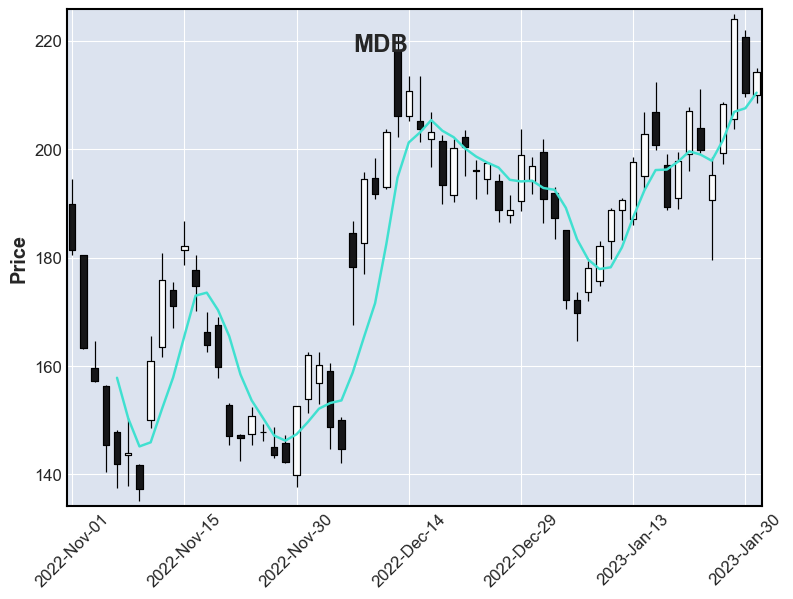

In [12]:
#candlestick with moving avg
for symbol in ticker_symbols:
    dataframe = f'{symbol}_historical_prices.csv'
    data = pd.read_csv(dataframe)
    data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)
    data = data.set_index('Date')
    mpf.plot(data['2022-11':'2023-01'], title = symbol, type="candle", mav=5, tight_layout=True)

In [13]:
master_df = None
for i in range(1, 9):
    symbol1 = ticker_symbols[i]
    symbol2 = ticker_symbols[i+1]
    
    df1 = pd.read_csv(f'{symbol1}_historical_prices.csv')
    df2 = pd.read_csv(f'{symbol2}_historical_prices.csv')
    merged_df = df1.merge(df2, on="Date", how="left", suffixes=(f'_{symbol1}', f'_{symbol2}'))
    
    if master_df is None:
        master_df = merged_df
    else:
        master_df = master_df.merge(merged_df, on="Date", how="left")
        

print(master_df)

           Date  Open_SBIN.NS  High_SBIN.NS  Low_SBIN.NS  Close_SBIN.NS  \
0    2022-06-06    464.200012    465.600006   456.500000     463.700012   
1    2022-06-07    461.850006    465.950012   460.500000     463.399994   
2    2022-06-08    466.600006    475.549988   463.200012     471.299988   
3    2022-06-09    468.950012    470.899994   462.450012     466.950012   
4    2022-06-10    462.000000    464.149994   458.600006     461.850006   
..          ...           ...           ...          ...            ...   
244  2023-05-31    583.799988    584.799988   577.500000     579.849976   
245  2023-06-01    581.799988    586.400024   581.000000     582.750000   
246  2023-06-02    584.700012    588.900024   583.000000     587.200012   
247  2023-06-05    588.500000    589.799988   586.000000     587.200012   
248  2023-06-06    588.000000    588.900024   583.000000     585.349976   

     Adj Close_SBIN.NS  Volume_SBIN.NS  Open_TSLA_x  High_TSLA_x  Low_TSLA_x  \
0           454.860

In [14]:
master_df_final = master_df.T.drop_duplicates().T
print(master_df_final)
master_df_final.to_csv('final-merged.csv')

           Date Open_SBIN.NS High_SBIN.NS Low_SBIN.NS Close_SBIN.NS  \
0    2022-06-06   464.200012   465.600006       456.5    463.700012   
1    2022-06-07   461.850006   465.950012       460.5    463.399994   
2    2022-06-08   466.600006   475.549988  463.200012    471.299988   
3    2022-06-09   468.950012   470.899994  462.450012    466.950012   
4    2022-06-10        462.0   464.149994  458.600006    461.850006   
..          ...          ...          ...         ...           ...   
244  2023-05-31   583.799988   584.799988       577.5    579.849976   
245  2023-06-01   581.799988   586.400024       581.0        582.75   
246  2023-06-02   584.700012   588.900024       583.0    587.200012   
247  2023-06-05        588.5   589.799988       586.0    587.200012   
248  2023-06-06        588.0   588.900024       583.0    585.349976   

    Adj Close_SBIN.NS Volume_SBIN.NS Open_TSLA_x High_TSLA_x  Low_TSLA_x  ...  \
0          454.860901       10661432  244.353333  244.866669  234.

In [15]:
master_df_final.fillna(0, inplace = True)
print(master_df_final)
master_df_final.to_csv('stockprices-final.csv')

           Date  Open_SBIN.NS  High_SBIN.NS  Low_SBIN.NS  Close_SBIN.NS  \
0    2022-06-06    464.200012    465.600006   456.500000     463.700012   
1    2022-06-07    461.850006    465.950012   460.500000     463.399994   
2    2022-06-08    466.600006    475.549988   463.200012     471.299988   
3    2022-06-09    468.950012    470.899994   462.450012     466.950012   
4    2022-06-10    462.000000    464.149994   458.600006     461.850006   
..          ...           ...           ...          ...            ...   
244  2023-05-31    583.799988    584.799988   577.500000     579.849976   
245  2023-06-01    581.799988    586.400024   581.000000     582.750000   
246  2023-06-02    584.700012    588.900024   583.000000     587.200012   
247  2023-06-05    588.500000    589.799988   586.000000     587.200012   
248  2023-06-06    588.000000    588.900024   583.000000     585.349976   

     Adj Close_SBIN.NS  Volume_SBIN.NS  Open_TSLA_x  High_TSLA_x  Low_TSLA_x  \
0           454.860